[View in Colaboratory](https://colab.research.google.com/github/fabiansd/Predict-future-sales-Russian-market/blob/master/PricePrediction.ipynb)

#Initiell kode

Må kjøres hver gang notebooken startes opp på nytt. Laster ned datasettene fra Kaggle

In [0]:
!pip install kaggle-cli
!kg download -u fabiansd  -p thisisnotmyrealpassword -c competitive-data-science-predict-future-sales
!gzip -d sales_train.csv.gz
!gzip -d sample_submission.csv.gz
!gzip -d test.csv.gz
!gzip -d items.csv.gz
!gzip -d item_categories.csv.gz
!gzip -d shops.csv.gz
!ls

# Databehandling

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

pd.options.mode.chained_assignment = None  # default='warn'

pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


sales_train = pd.read_csv('sales_train.csv')
sample_submission = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')
items = pd.read_csv('items.csv')
items_cat = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')

In [5]:
#Generate data time
sales_train['date'] = pd.to_datetime(sales_train['date'], format='%d.%m.%Y')
sales_train['month'] = sales_train['date'].dt.month
sales_train['year'] = sales_train['date'].dt.year

#Merge dataframes
sales_train = pd.merge(sales_train, items, on='item_id')
sales_train = pd.merge(sales_train, items_cat, on='item_category_id')
sales_train = pd.merge(sales_train, shops, on='shop_id')

#rearrange order
rearrange = ['date','month','year','date_block_num','item_id','item_name','item_price','item_cnt_day','item_category_id','item_category_name','shop_id','shop_name']
train = sales_train[rearrange]
train.head()

,date,month,year,date_block_num,item_id,item_name,item_price,item_cnt_day,item_category_id,item_category_name,shop_id,shop_name
0,2013-01-02,1,2013,0,22154,ЯВЛЕНИЕ 2012 (BD),999.0,1.0,37,Кино - Blu-Ray,59,"Ярославль ТЦ ""Альтаир"""
1,2013-04-26,4,2013,3,944,2012 (BD),150.0,1.0,37,Кино - Blu-Ray,59,"Ярославль ТЦ ""Альтаир"""
2,2013-06-26,6,2013,5,944,2012 (BD),199.5,1.0,37,Кино - Blu-Ray,59,"Ярославль ТЦ ""Альтаир"""
3,2013-07-20,7,2013,6,944,2012 (BD),199.5,1.0,37,Кино - Blu-Ray,59,"Ярославль ТЦ ""Альтаир"""
4,2013-09-14,9,2013,8,944,2012 (BD),299.0,2.0,37,Кино - Blu-Ray,59,"Ярославль ТЦ ""Альтаир"""


In [6]:
train.describe()

,month,year,date_block_num,item_id,item_price,item_cnt_day,item_category_id,shop_id
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,6.247717e+00,2.013777e+03,1.456991e+01,1.019723e+04,8.908532e+02,1.242641e+00,4.000138e+01,3.300173e+01
std,3.536219e+00,7.684790e-01,9.422988e+00,6.324297e+03,1.729800e+03,2.618834e+00,1.710076e+01,1.622697e+01
min,1.000000e+00,2.013000e+03,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,0.000000e+00,0.000000e+00
25%,3.000000e+00,2.013000e+03,7.000000e+00,4.476000e+03,2.490000e+02,1.000000e+00,2.800000e+01,2.200000e+01
50%,6.000000e+00,2.014000e+03,1.400000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.000000e+01,3.100000e+01
75%,9.000000e+00,2.014000e+03,2.300000e+01,1.568400e+04,9.990000e+02,1.000000e+00,5.500000e+01,4.700000e+01
max,1.200000e+01,2.015000e+03,3.300000e+01,2.216900e+04,3.079800e+05,2.169000e+03,8.300000e+01,5.900000e+01


In [0]:
plt.figure(figsize=(15,10))

sns.distplot(train['item_price'],bins=100, kde=False);

#plt.hist(train['item_price'], bins = 100)

plt.ylabel('Antall')
plt.xlabel('Salgspris')
plt.title('Fordeling av slagspris')

In [0]:
plt.figure(figsize=(18, 12))
plt.scatter(train['item_price'],train['item_price'] , color='black', label='Registreringer')
plt.ylabel('Salgspris')
plt.xlabel('Byggår')
plt.title('Byggår mot salgspris')
plt.legend(loc='upper left')
plt.show()

## Ekstrempunkter

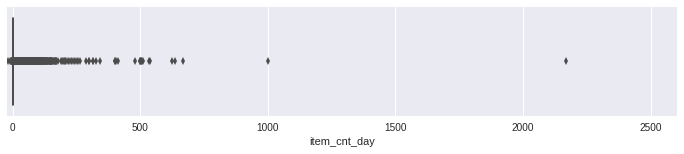

In [37]:
plt.figure(figsize=(12,2))
plt.xlim(train['item_cnt_day'].min(), train['item_cnt_day'].max()*1.2)
sns.boxplot(x=train['item_cnt_day'])

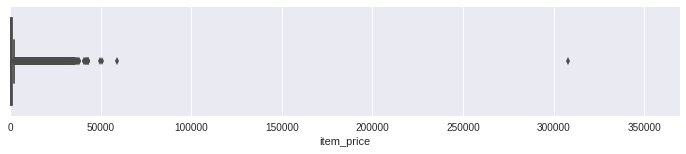

In [38]:
plt.figure(figsize=(12,2))
plt.xlim(train['item_price'].min(), train['item_price'].max()*1.2)
sns.boxplot(x=train['item_price'])


## Visualisering

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


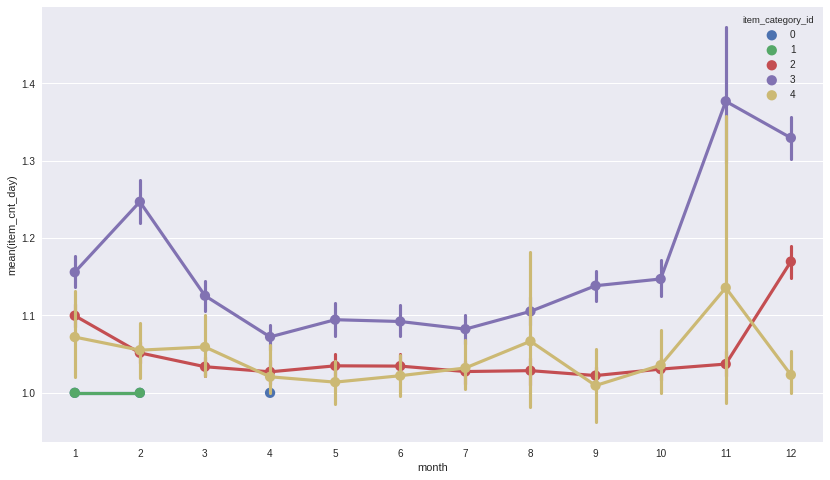

In [19]:
plt.figure(figsize=(14,8))

sns.pointplot(x='month', y='item_cnt_day', hue='item_category_id', 
                      data=train[train['item_category_id'] < 5])

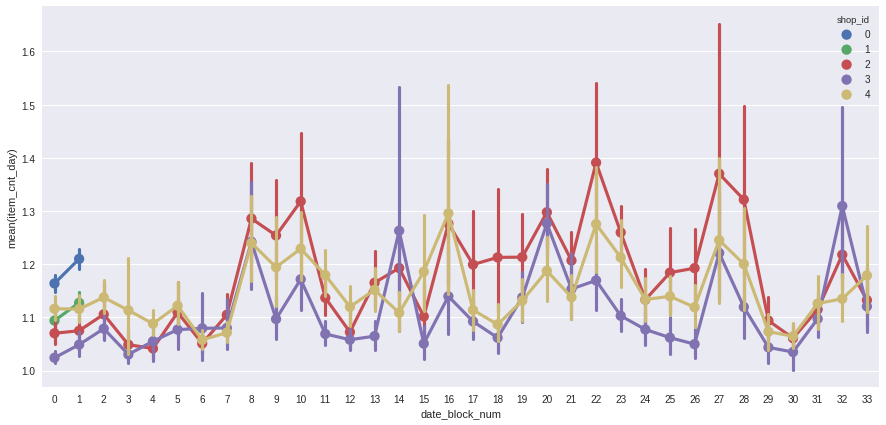

In [21]:
plt.figure(figsize=(15,7))

sns.pointplot(x='date_block_num', y='item_cnt_day', hue='shop_id', data=train[train['shop_id']<5])

In [0]:
plt.figure(figsize=(16, 7))
sns.countplot(x='month', data=train)
plt.title('Salg per år fordelt over måneder')

In [0]:
plt.figure(figsize=(16, 7))
sns.countplot(x='year', hue='month', data=train)
plt.title('Salg per år fordelt over måneder')

In [0]:
plt.figure(figsize=(16, 7))
sns.countplot(x='year', hue='month', data=train)
plt.title('Salg per år fordelt over måneder')

## Korrelasjon

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text yticklabel objects>)

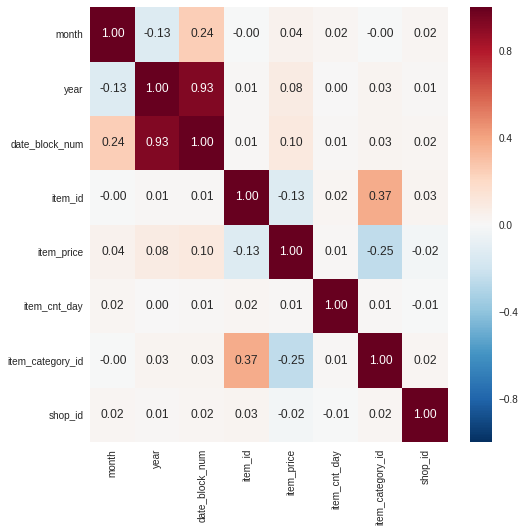

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(train.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

## Feature konstruksjon?

In [0]:
#train['revenue'] = train['item_price'] *  train['item_cnt_day']